In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
# load the dataset
df = pd.read_csv('/content/winequality-red.csv', encoding='ISO-8859-1')

In [ ]:
df.head(18)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# Data type information and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# check for duplicate rows
print(df.duplicated().sum())

240


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# summary statistics of numerical features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


What are the most correlated features with wine quality?

Are there strong relationships between chemical properties?

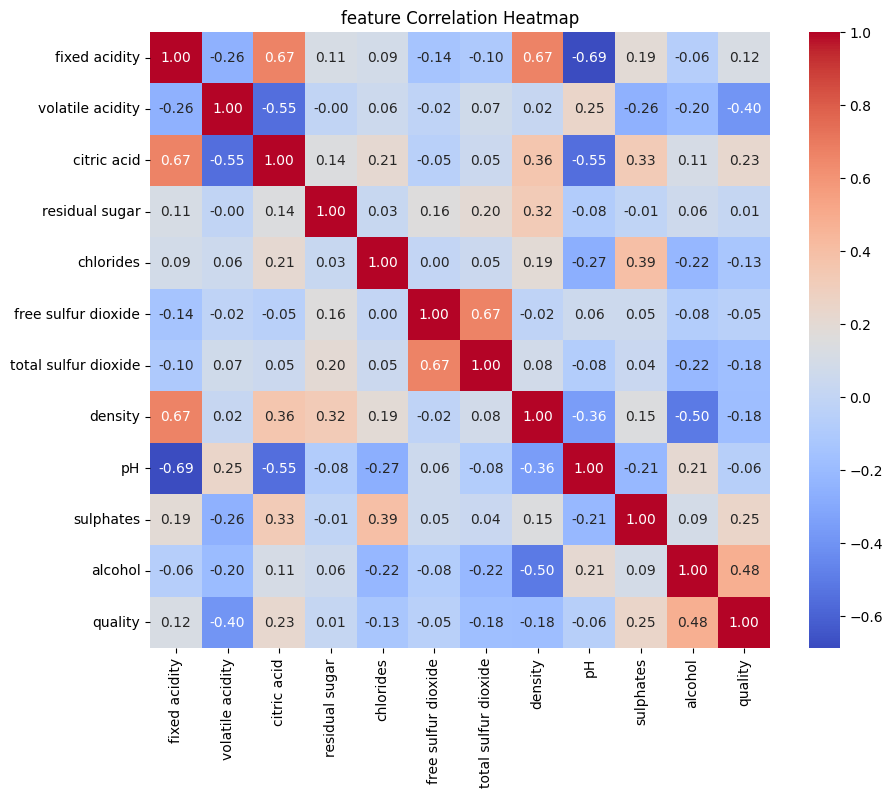

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


In [ ]:
# compute correration matrix
corr_matrix = df.corr()

# display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('feature Correlation Heatmap')
plt.show()

# Sort correlations with quality
print(corr_matrix['quality'].sort_values(ascending=False))

What is the distribution of wine quality?

How do chemical properties vary across different wine qualities?

<ipython-input-23-59834611be2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette="coolwarm")


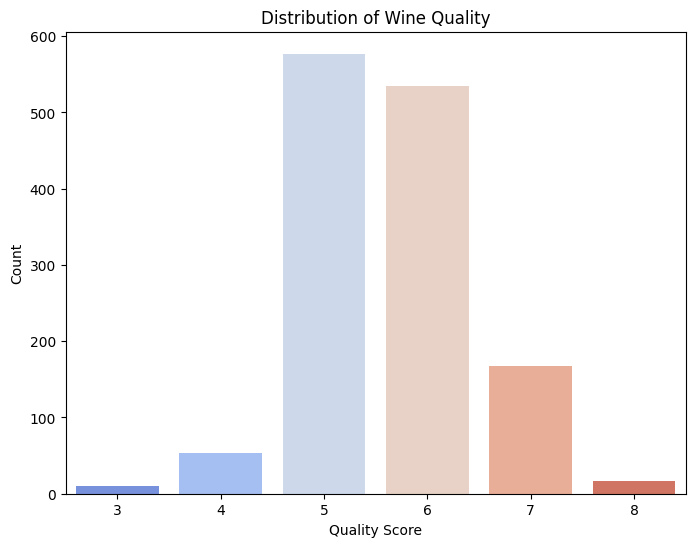

In [ ]:
# What is the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette="coolwarm")
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

<ipython-input-25-388541f8807c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette="coolwarm")


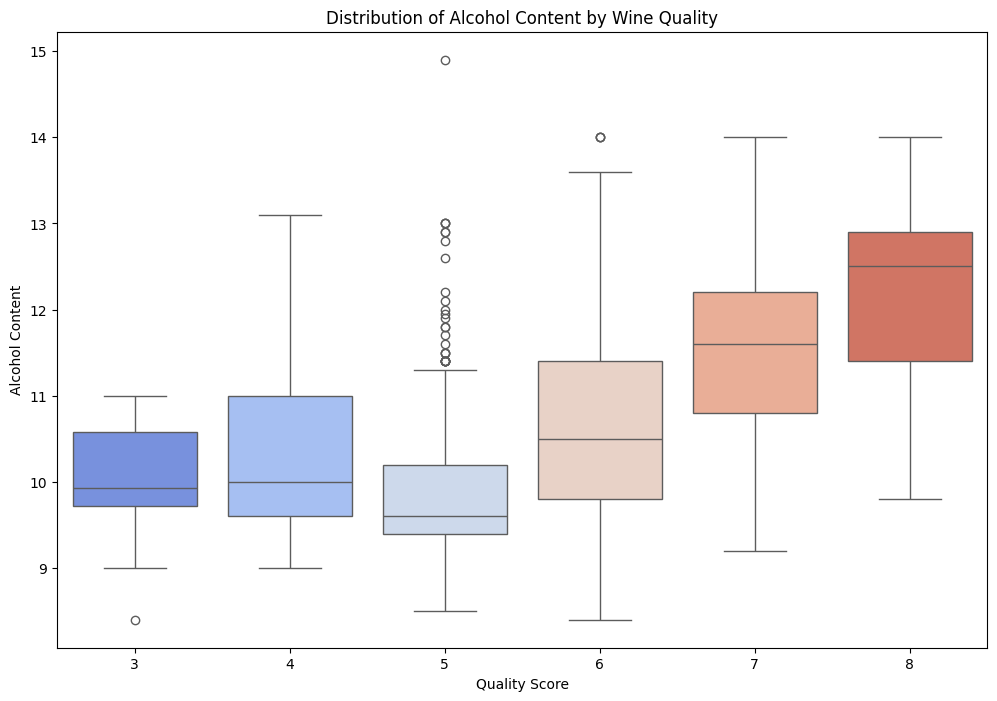

In [ ]:
# How do chemical properties vary across different wine qualities?
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=df, palette="coolwarm")
plt.title('Distribution of Alcohol Content by Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol Content')
plt.show()

Does alcohol content significantly  impact wine quality?

Does acidity affect wine quality?

In [ ]:
# T-test for alcohol vs. quality groups
alcohol_low_quality = df[df['quality'] >= 6]['alcohol']
alcohol_high_quality = df[df['quality'] <=6]['alcohol']
t_statistic, p_value = stats.ttest_ind(alcohol_low_quality, alcohol_high_quality)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Chi-square test for acidity and quality
contingency_table = pd.crosstab(df['quality'], df['pH'])
chi2_statistic, p_value, dof, expected_ = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

T-statistic: 12.872542012386178
P-value: 2.067125654701149e-36
Chi-square statistic: 588.3460804227988
P-value: 2.6759149451802295e-06


In [ ]:
# Export Data
df.to_csv('wine_quality_cleaned.csv', index=False)


In [ ]:
# Download cleaned Data
from google.colab import files
files.download('wine_quality_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>